# LOADING IMAGE

In [1]:
import mmcv
import src.features.build_features as pp
from src.visualization.visualize import *

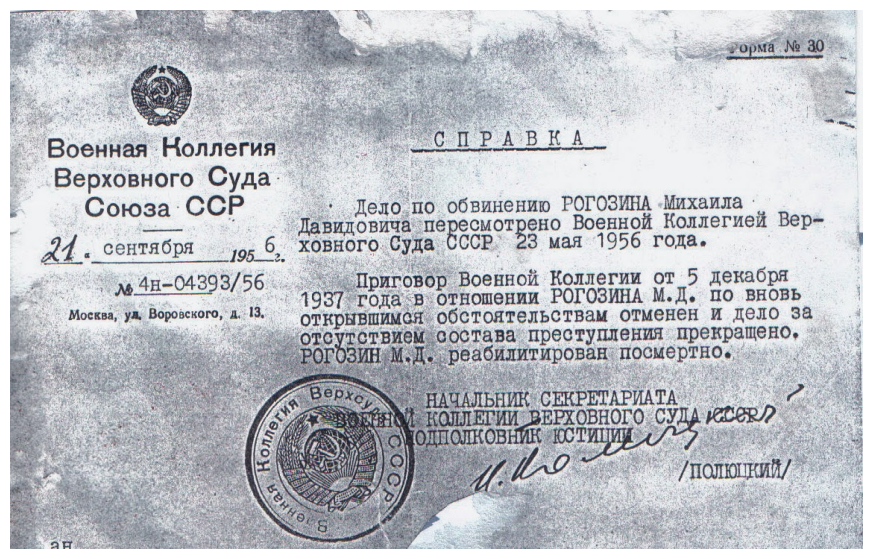

In [2]:
url0 = '../data/raw/example.jpg'
url1 = '../data/raw/example1.jpg'
image0 = mmcv.imread(url0)
image1 = mmcv.imread(url1)

show(image0)

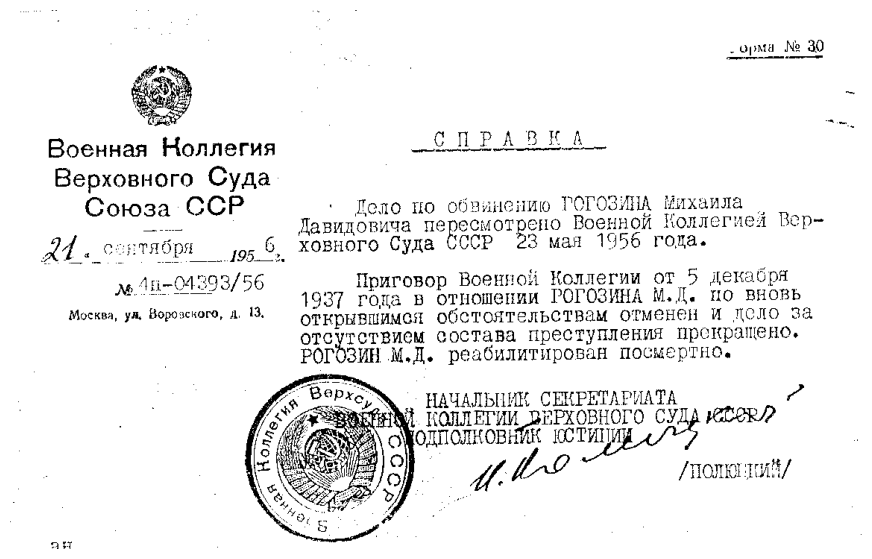

In [3]:
def preprocessing(image):
    image = mmcv.bgr2gray(image)
    image = pp.threshold(image, thresh=90)
    image = mmcv.gray2rgb(image)

    return image

image0 = preprocessing(image0)
image1 = preprocessing(image1)

show(image0)

# USING OCR

In [4]:
from models.ocr.ocr import OCRModelFactory
from src.utils.utils import *

In [7]:
det='DBNet'
det_weights=r'models\ocr\mmocr\dbnet\dbnet_resnet50-oclip_1200e_icdar2015_20221102_115917-bde8c87a.pth'

rec='SAR'
rec_config = get_abspath(r'models\ocr\mmocr\config.py')
rec_weights=r'models\ocr\mmocr\sar\epoch_10.pth'

In [9]:
# Load models into memory
mmocr = OCRModelFactory.create("mmocr")
ocr = mmocr(det=det,
            det_weights=det_weights,
            rec=rec_config,
            rec_weights=rec_weights,
            device='cuda')

Loads checkpoint by local backend from path: C:\Users\dimka\PycharmProjects\TatneftIT_OCR\src\..\models\ocr\mmocr\dbnet\dbnet_resnet50-oclip_1200e_icdar2015_20221102_115917-bde8c87a.pth
Loads checkpoint by local backend from path: C:\Users\dimka\PycharmProjects\TatneftIT_OCR\src\..\models\ocr\mmocr\sar\epoch_10.pth


In [10]:
result = ocr([image0, image1], return_vis=True)
None

Output()

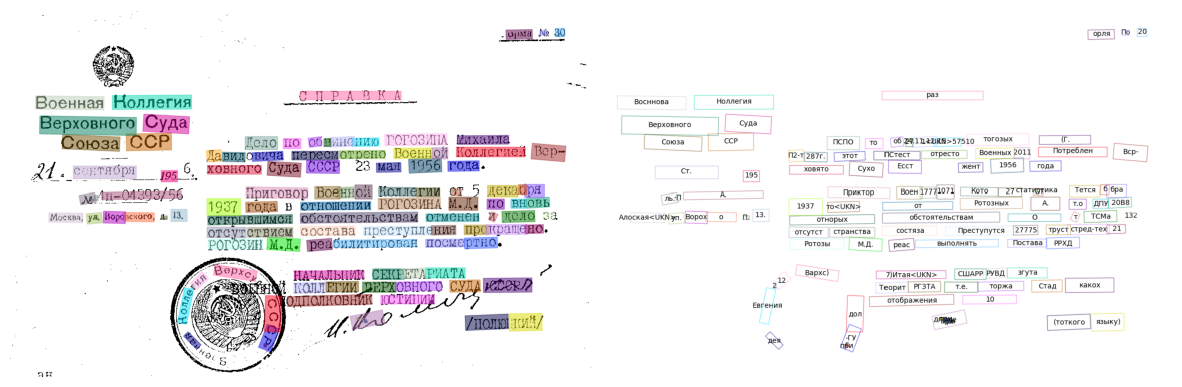

In [11]:
show(result['visualization'][0])

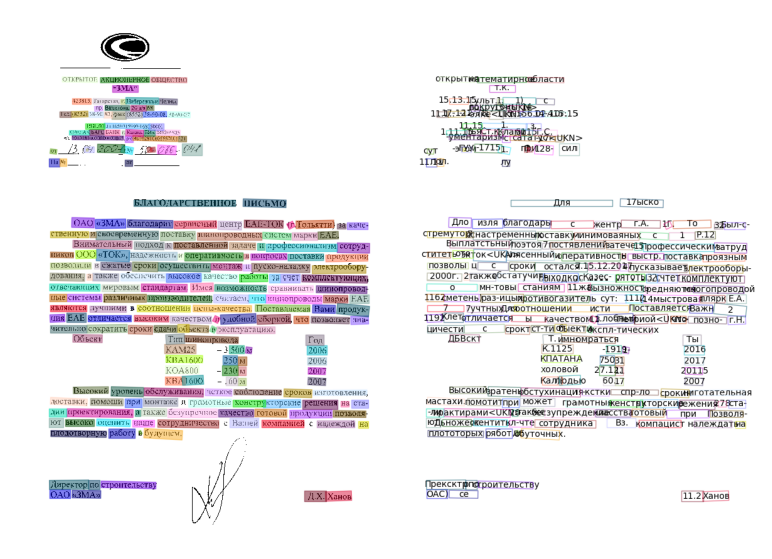

In [12]:
show(result['visualization'][1])